In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from empiricaldist import Pmf
from empiricaldist import Cdf

In [2]:
df = pd.read_csv('data_music_trends.csv', sep=",", encoding='cp1252')


In [3]:
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
df.drop(['Unnamed: 0'], axis= 1, inplace= True)

# 1

In [5]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


# 2

In [6]:
df.shape

(603, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
title        603 non-null object
artist       603 non-null object
top genre    603 non-null object
year         603 non-null int64
bpm          603 non-null int64
nrgy         603 non-null int64
dnce         603 non-null int64
dB           603 non-null int64
live         603 non-null int64
val          603 non-null int64
dur          603 non-null int64
acous        603 non-null int64
spch         603 non-null int64
pop          603 non-null int64
dtypes: int64(11), object(3)
memory usage: 66.0+ KB


In [7]:
# Check for null values

df.isnull().sum() 

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

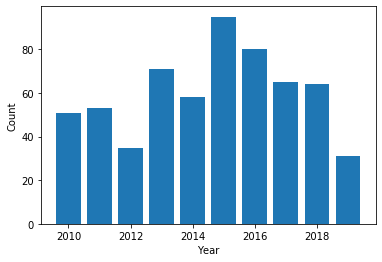

In [17]:
pmf_year = Pmf.from_seq(df['year'], normalize= False)

# Plot the PMF
pmf_year.bar()

# Label the axes
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

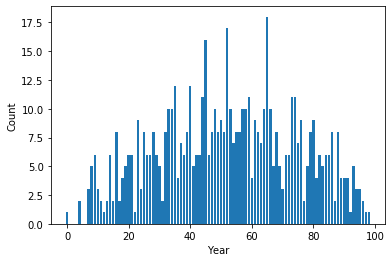

In [24]:
pmf_val = Pmf.from_seq(df['val'], normalize= False)

# Plot the PMF
pmf_val.bar()
# Label the axes
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

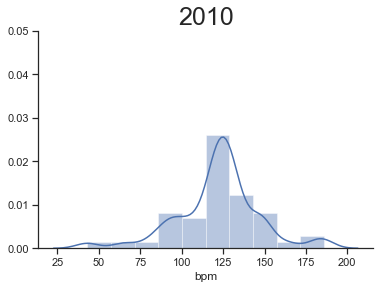

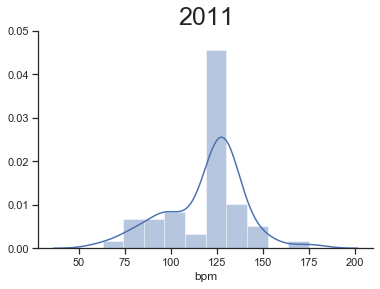

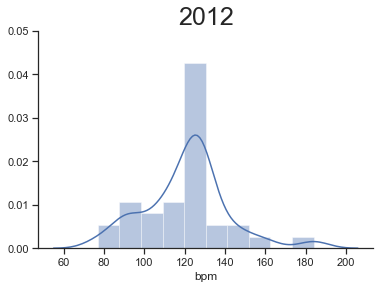

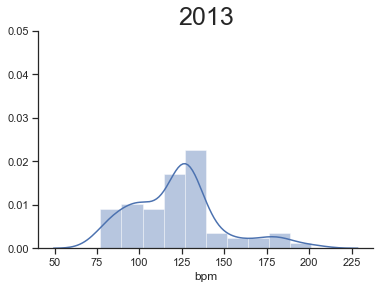

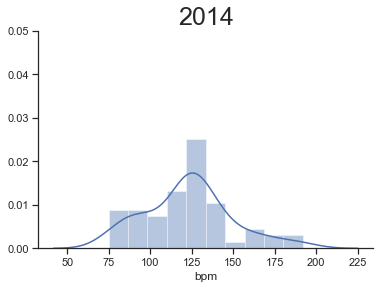

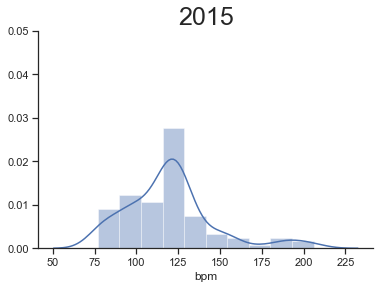

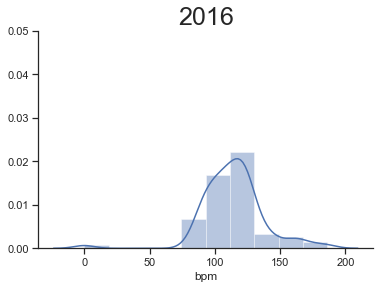

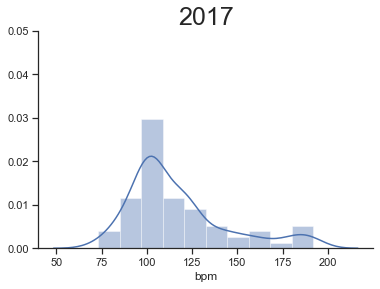

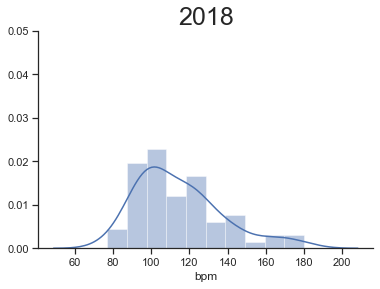

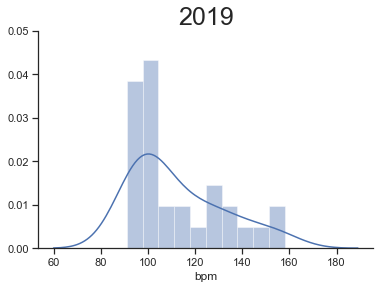

In [55]:
years = list(df['year'].unique())

for year in years:
    
    data = df[df['year'] == year]

    sns.set(style="ticks")

    f, ax = plt.subplots(sharex= True, sharey= True)

    sns.distplot(data['bpm'], ax=ax, bins= 10)

    sns.despine(ax=ax)
    ax.set_title(year, size= 25) 
    ax.set_ylim(0,0.05)
    
    plt.show()


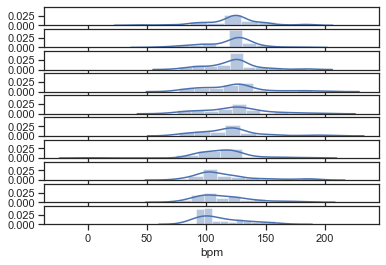

In [47]:
datas = []

for year in range(2010,2020):
    data= df[df['year'] == year]
    datas.append(data)
    
# Create the graphs
    
f, ax = plt.subplots(10, sharex= True, sharey= True)
    
for i in range(0,10):
    sns.distplot(datas[i]['bpm'], ax=ax[i], bins= 10)
    
